In [15]:
import pandas as pd

FILENAME = 'resource_usage.csv'

df = pd.read_csv(
    FILENAME,
    sep=';',
    header=0,
)
resource_usages = dict(zip(df.columns, df.iloc[0]))
resource_usages.pop('Unnamed: 0')
resource_usages

{'native_MVNN': 5,
 'base_NN': 7,
 'posthoc_CP_NN': 6,
 'posthoc_LA_NN': 1,
 'native_QHGBR': 5,
 'base_HGBR': 2,
 'posthoc_CP_HGBR': 2,
 'native_QR': 5,
 'base_Linreg': 1,
 'posthoc_CP_Linreg': 1,
 'native_GP': 3}

saving
showing


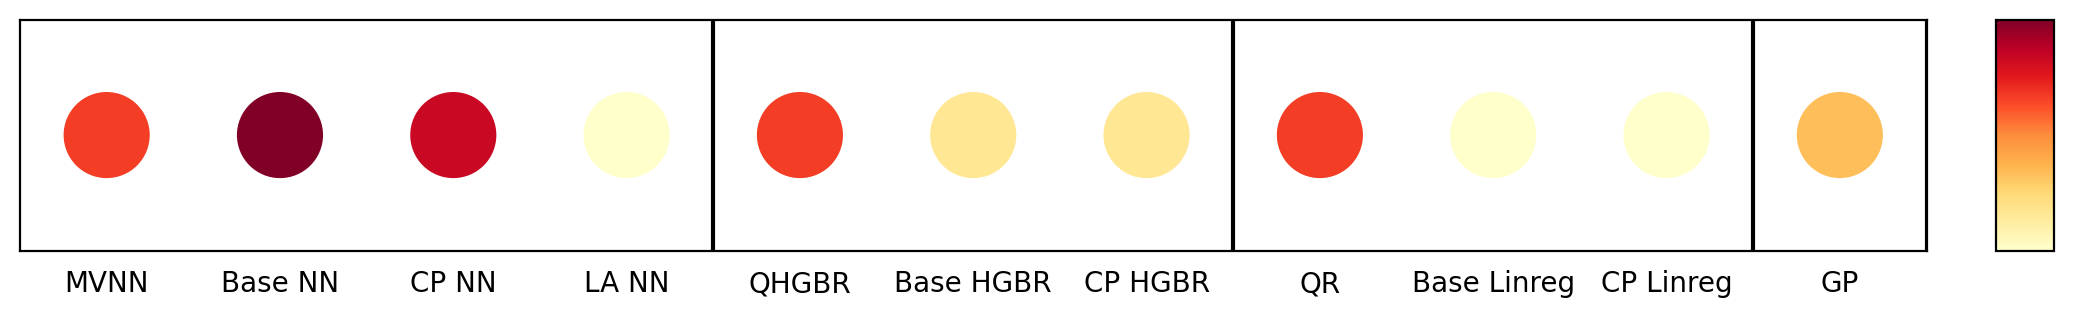

In [81]:
import matplotlib.pyplot as plt
import numpy as np


DPI = 200
FILEPATH = 'comparison_storage/plots/resource_usages.png'

def _update_prefix(string):
    old_string = string
    new_string = ' '.join(old_string.split('_')[1:])
    if old_string.startswith('base_'):
        new_string = f'Base {new_string}'
    return new_string

group_sizes = [4, 3, 3, 1]
cum_group_sizes = np.cumsum(group_sizes)

shift = 0.5
x_plot = np.arange(len(resource_usages))
# fig, axs = plt.subplots(3, 4, figsize=(15,6))
fig, ax = plt.subplots(figsize=(15, 1.5), dpi=DPI)

x_min, x_max = x_plot.min() - shift, x_plot.max() + shift
vlines_xs = [x_min + cum_group_size for cum_group_size in cum_group_sizes]

# for ax in axs:
plt.scatter(x_plot, np.ones_like(x_plot), c=resource_usages.values(), cmap='YlOrRd', s=30**2)
plt.yticks([])
labels = [_update_prefix(label) for label in resource_usages.keys()]
ax.set_xlim(x_min, x_max)
ax.set_xticks(x_plot, labels)
ax.xaxis.set_ticks_position('none')
for x in vlines_xs:
    ax.axvline(x, color='black')
plt.colorbar(ticks=[], aspect=4, pad=0.03)
if FILEPATH is not None:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')